In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

import sys
sys.path.insert(0, '../')

In [8]:
freq, power = np.loadtxt('../libra/data/aigrain2003.csv', delimiter=',', unpack=True)

freq *= u.uHz
power *= (u.W * u.m**-2) **2 * u.Hz**-1


Text(0,0.5,'Power [W2 / (Hz m4)]')

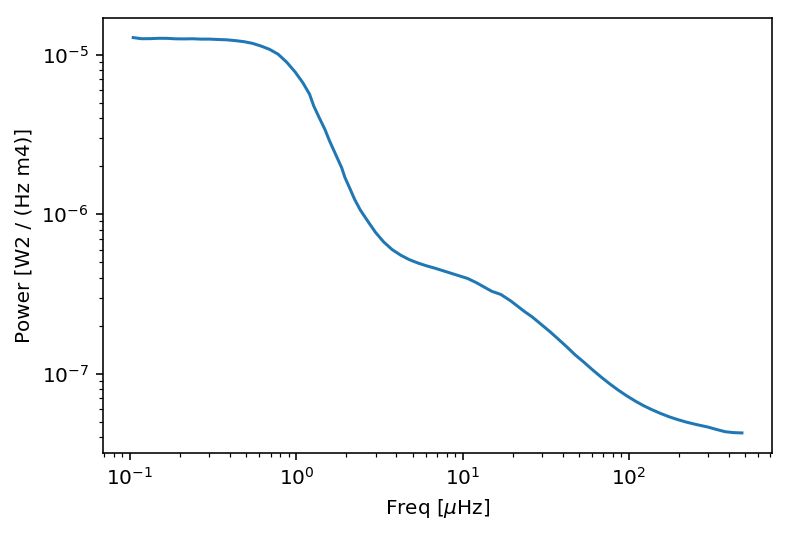

In [9]:
plt.loglog(freq, power)
plt.xlabel('Freq [$\mu$Hz]')
plt.ylabel('Power [{0}]'.format(power.unit))

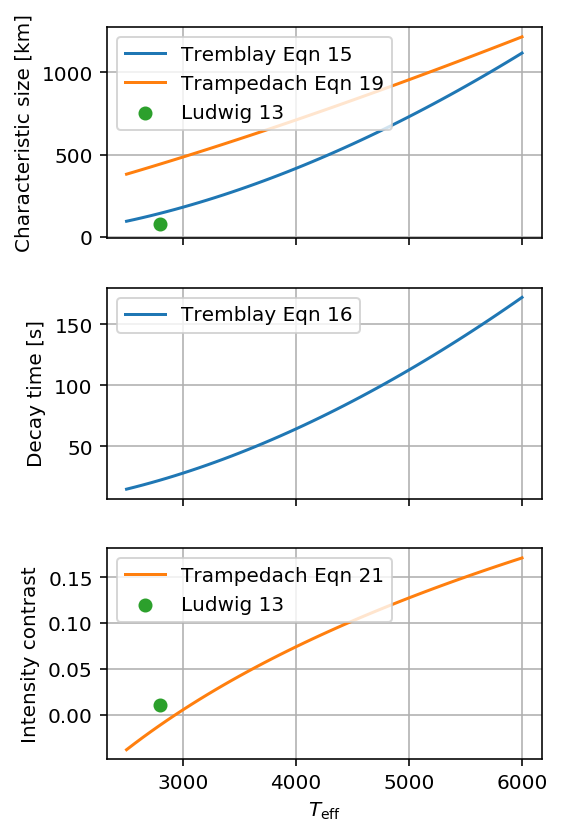

In [35]:
def tremblay_char_size(logg, teff, z=0):
    """Tremblay 2013 Eqn 15"""
    return 13.5 * (teff - 300 * logg)**1.75 * 10**(0.05 * z) / 10**logg * u.km

def tremblay_decay_time(logg, teff, z=0):
    """Tremblay 2013 Eqn 16"""
    return 2.08 * (teff - 300 * logg)**1.75 * 10**(0.05 * z) / 10**logg * u.s

def trampedach_char_size(logg, teff, z=0):
    """Trampedach 2013 Eqn 19"""
    return 10**(1.3210 * np.log10(teff) - 1.0970 * logg + 0.0306) * u.Mm

def trampedach_intensity(logg, teff, z=0):
    """Trampedach 2013 Eqn 21"""
    return (54.98 * np.log10(teff) - 4.80 * logg - 169.00) / 100

logg = 4.5
teffs = np.linspace(2500, 6000)
tremblay_sizes = tremblay_char_size(logg, teffs)
tremblay_decays = tremblay_decay_time(logg, teffs)
trampedach_sizes = trampedach_char_size(logg, teffs)
trampedach_int = trampedach_intensity(logg, teffs)

fig, ax = plt.subplots(3, 1, figsize=(4, 6), sharex=True)
ax[0].plot(teffs, tremblay_sizes, label='Tremblay Eqn 15')
ax[0].plot(teffs, trampedach_sizes.to(u.km), label='Trampedach Eqn 19')

ax[1].plot(teffs, tremblay_decays, label='Tremblay Eqn 16')
ax[0].set(ylabel='Characteristic size [km]')
ax[1].set(ylabel='Decay time [s]')

ax[2].set(ylabel='Intensity contrast')

ax[2].plot(teffs, trampedach_int, label='Trampedach Eqn 21', c='C1')
ax[-1].set(xlabel='$T_\mathrm{eff}$')

ax[0].scatter([2800], [80], label='Ludwig 13', color='C2')

ax[2].scatter([2800], [0.011], label='Ludwig 13', color='C2')

for axis in ax: 
    axis.grid()
    axis.legend(loc='upper left', fontsize=10)
fig.tight_layout()
fig.savefig('granulation.pdf', bbox_inches='tight')